# Evaluating model
 #### three ways:
 * built-in 'score()'
 * scoring parameter
 * Problem-specific metric functions

In [2]:
import pandas as pd
heart_disease = pd.read_csv('./Data/heart-disease.csv')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train,y_tarin);


In [3]:
clf.score(X_test,y_test)


0.819672131147541

In [4]:
cross_val_score(clf,X,y).mean()

0.8315300546448088

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df  = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

In [11]:
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_tarin)


RandomForestRegressor(n_estimators=200)

In [7]:
model.score(X_test,y_test)

0.8069585970797812

### Classification MOdel Evaluation Matrics

* Accuracy
* Area Under ROC curve
* Confusion Matrix
* Classification Report 

### 1 Accuracy - cross_val_score

### 2 Area Under ROC Curve
* Area under reciever operating characteristic curve (AUC/ROC)
* compares true positive rate vs false positive rate

In [12]:
from sklearn.metrics import roc_curve

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf.fit(X_train,y_tarin)

y_prob_pos = clf.predict_proba(X_test)[:, 1]

fpr,tpr,threshold = roc_curve(y_test,y_prob_pos)

In [16]:
fpr,tpr,threshold

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.10344828, 0.13793103, 0.13793103,
        0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.37931034,
        0.48275862, 0.55172414, 0.75862069, 0.82758621, 0.93103448,
        1.        ]),
 array([0.     , 0.03125, 0.125  , 0.375  , 0.4375 , 0.46875, 0.46875,
        0.53125, 0.65625, 0.71875, 0.75   , 0.75   , 0.78125, 0.8125 ,
        0.875  , 0.875  , 0.90625, 0.90625, 0.96875, 0.96875, 0.96875,
        1.     , 1.     , 1.     , 1.     , 1.     ]),
 array([1.99, 0.99, 0.98, 0.81, 0.79, 0.78, 0.76, 0.74, 0.7 , 0.68, 0.64,
        0.62, 0.59, 0.58, 0.56, 0.55, 0.46, 0.39, 0.28, 0.14, 0.11, 0.09,
        0.06, 0.04, 0.03, 0.  ]))

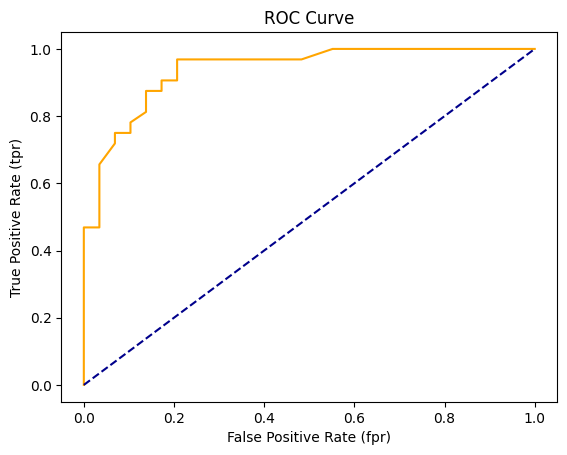

In [17]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, c='orange', label = 'ROC')
    plt.plot([0,1],[0,1], color='darkblue', ls='--',label = 'Guessing')
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('ROC Curve')
    plt.show()

plot_roc_curve(fpr,tpr)

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob_pos)

0.9380387931034483

### 3 Confusion Matrix
compares the labels a model predicts and the actual label it was supposed to predict

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [20]:
# visualize confusion_matrix
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,24,5
1,4,28


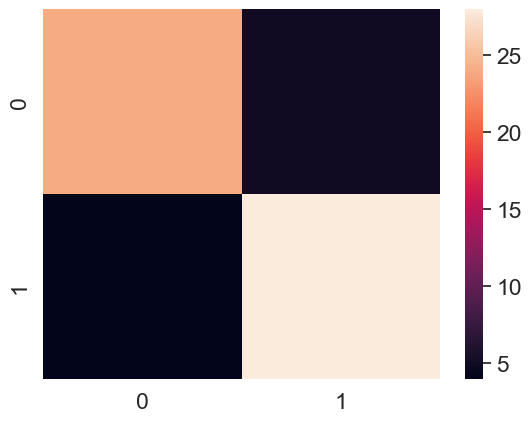

In [22]:
import seaborn as sns


confusion_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat);



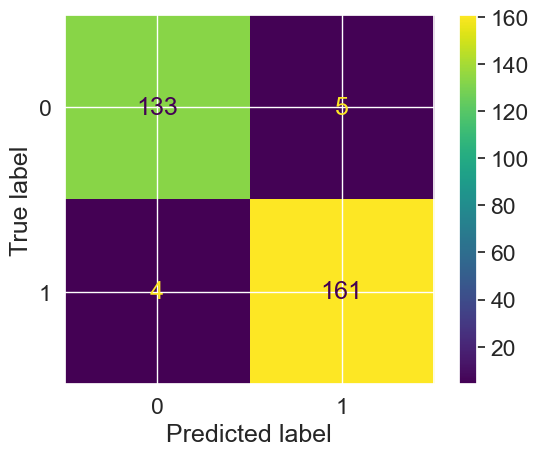

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X,y=y);

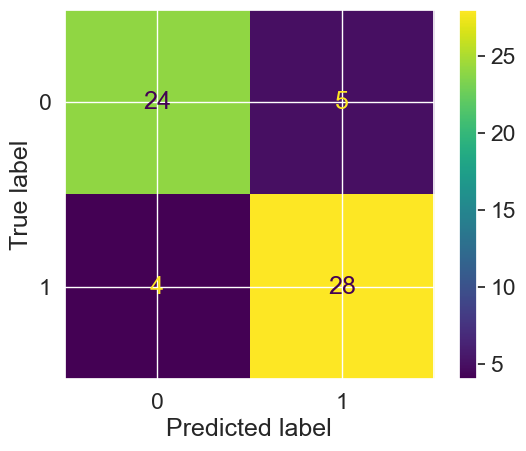

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);

### 4 Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

